# Titanic

## Data Description

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
import pickle

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
df= pd.read_csv(r"titanic_train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### About Columns

1- Passenger Id: Integer Variable

2- Survived: Survival of passenger (1=Yes, 0=No) is the target variable

3- Pclass: Ticket Class(A proxy of Socio-Economic Status of passenger). 1- 1st class, 2- 2nd class, 3- 3rd class

4- Name: Name of passenger

5- Sex: Sex of passenger (male, female)

6- Age: Age of passenger

7- sibsp: (Family) Number Siblings and spouse of passenger aboard

8- parch: parents or children of passenger aboard

9- Ticket: Ticket number of passenger

10- Fare: Passenger Fare

11- cabin: Cabin Number

12- Embarked: Post of Embarktion (C=Cherbourg, Q=Queenstown, S=Southampton)

## EDA

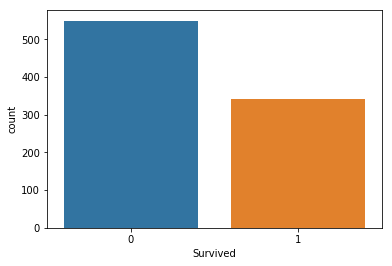

In [5]:
# To check if data set is balanced or not
sns.countplot(x="Survived",data=df)

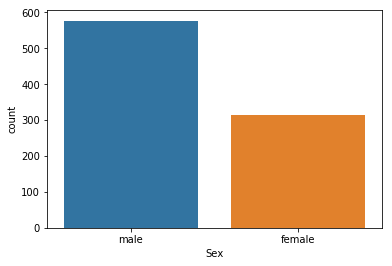

In [6]:
sns.countplot(x="Sex",data=df)

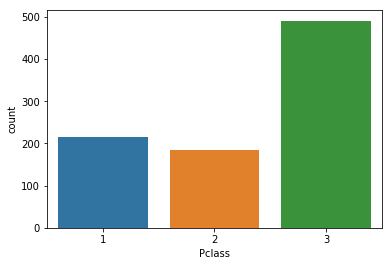

In [7]:
sns.countplot(x="Pclass",data=df)

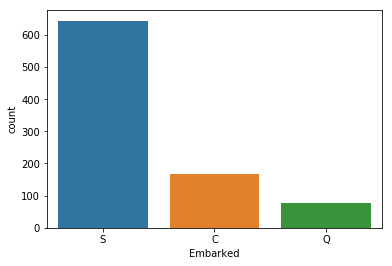

In [8]:
sns.countplot(x="Embarked",data=df)

#### checking factors influence on survival

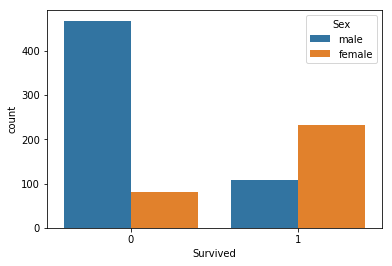

In [9]:
sns.countplot(df["Survived"],hue=df["Sex"])   
plt.show()

From above plot we observe most of the males died

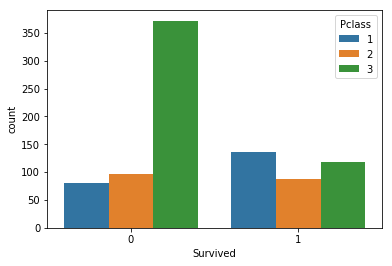

In [10]:
sns.countplot(df["Survived"],hue=df["Pclass"])
plt.show()

Passengers in class 3 were the most among those who died

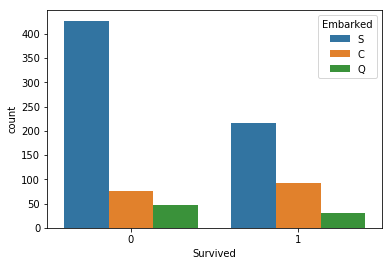

In [13]:
sns.countplot(df["Survived"],hue=df["Embarked"])
plt.show()

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Our data has null values. Age has 177 null values whereas cabin has 687 null values and Embarked have 2 null values

In [15]:
df.shape

(891, 12)

No. of rows= 891, No. of columns=12

### Dealing with Null Values

By looking at data and column descriptions we observe that PassengerId, Name and Ticket will not be effecting Survival of a passenger. Cabin columns has may nullvalues and its hard to fill all of them So we'll drop these coulmns from or data 

In [16]:
df= df.drop(columns=["PassengerId","Name","Ticket","Cabin"])

In [17]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [18]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [19]:
df.dropna(inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


Name, Sex, Ticket, Cabin, Embarked are non-numeric values and other variables are of numeric vales

### Describing data

In [21]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From above we observe the mean, Standard Deviation, median, quartiles, min value and max value for each feature. Object variables like Sex and Embarked are not described here

#### PassengerId

Mean= 446, std= 257.3538, min= 1, max= 891

#### Pclass

mean= 2.30, std= 0.8367, min= 1, max= 3

#### Age

mean= 29.699, std= 14.5262, min= 0.42, max= 80

#### SibSp

mean= 0.523, std= 1.1027, min= 0, max= 8

#### Parch

mean= 0.38159, std= 0.806, min= 0, max= 6

#### Fare

mean= 32.204, std= 49.693, min= 0, max= 512.329

We'll now encode the object columns using label encoder

In [22]:
lab_enc= LabelEncoder()
col=["Sex","Embarked"]
for i in col:
    df1= lab_enc.fit_transform(df[i])
    df[i]=df1
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### Correlation

In [23]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.335549,-0.541585,-0.074673,-0.034040,0.083151,0.255290,-0.169718
Pclass,-0.335549,1.000000,0.127741,-0.327954,0.081656,0.016824,-0.548193,0.164681
Sex,-0.541585,0.127741,1.000000,0.089434,-0.116348,-0.247508,-0.179958,0.110320
Age,-0.074673,-0.327954,0.089434,1.000000,-0.231875,-0.178232,0.088604,-0.028927
SibSp,-0.034040,0.081656,-0.116348,-0.231875,1.000000,0.414542,0.160887,0.068900
Parch,0.083151,0.016824,-0.247508,-0.178232,0.414542,1.000000,0.217532,0.040449
Fare,0.255290,-0.548193,-0.179958,0.088604,0.160887,0.217532,1.000000,-0.226311
Embarked,-0.169718,0.164681,0.110320,-0.028927,0.068900,0.040449,-0.226311,1.000000


### Plotting Heatmap

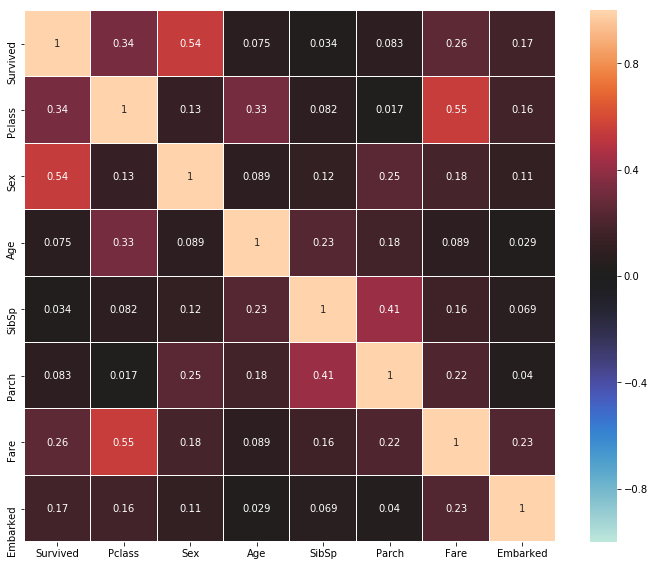

In [24]:
df_corr= df.corr().abs()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, square=True, center=0, fmt='.2g', linewidth=.1)
plt.tight_layout()

We observe a positive as well as negative correlation of features with target variable. Pclass has 33.8% negative correlation, Sex has 54.3% negative correlation, Age has 7.7% negative correlation, SibSp has 3.5% negative correlation, Parch has 8.2% positive correlation, Fare has 26% positive correlation and Embarked has 16.9% negative correlation.

Max Correlation with target column= Sex

Min Correlation with target column= SibSp

### Check for outliers

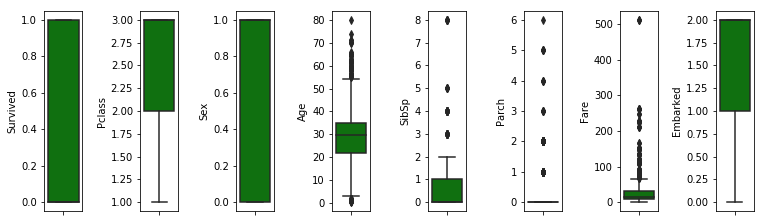

In [25]:
collist=df.columns.values
plt.figure(figsize=(20,30))
for i in range(0,len(collist)):
    plt.subplot(10,15,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

Age , sibsp, Parch and Fare has outliers

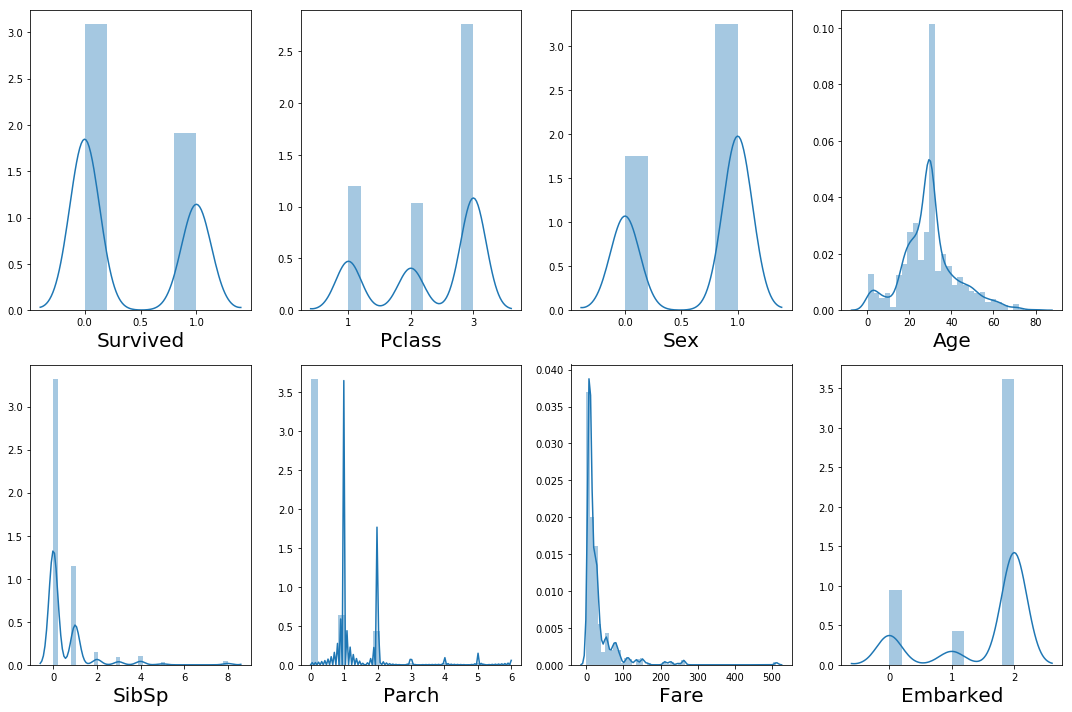

In [26]:
## checking for Normal Distribution of curve
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

We observe that the continous data is also not normalized

## Data Cleaning

We have alread dealt with missing values and removed those columns that have very less or no impact on survival of passenger now we'll remove outliers

In [27]:
z=np.abs(stats.zscore(df))
index=(np.where(z>3)[0])
df_new=df.drop(df.index[index])
df_new.shape

(818, 8)

#### Percentage of data loss

In [28]:
print("Percentage of data loss= ",((891-818)/891)*100)

Percentage of data loss=  8.19304152637486


Since data loss is more we will proceed with our original data

#### Check for skewness

In [29]:
x=df.drop(columns=["Survived"],axis=1)
y=df["Survived"]

In [30]:
x.skew()

Pclass     -0.636998
Sex        -0.625625
Age         0.431720
SibSp       3.691058
Parch       2.745160
Fare        4.801440
Embarked   -1.261367
dtype: float64

We observe skewness in our data so we'll use power transform to deal with skewed data

In [31]:
from sklearn.preprocessing import power_transform

In [32]:
x=power_transform(x,method='yeo-johnson')

In [33]:
## Scaling data
scale= StandardScaler()
x_scaled=scale.fit_transform(x)

## Model Building

In [34]:
lr=LogisticRegression()

#### Finding best random state

In [35]:
for i in range(0,500):
    x_train, x_test, y_train, y_test= train_test_split(x_scaled, y , test_size=0.25, random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    score_lr=accuracy_score(y_test,pred_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("Best random state is ",i)
        print("Training Score ",accuracy_score(y_train,pred_train)*100)
        print("Testing Score ",accuracy_score(y_test,pred_test)*100)
        break;

Best random state is  170
Training Score  80.33033033033034
Testing Score  80.26905829596413


We'll consider random state 170 for splitting data for other models

In [36]:
x_train, x_test, y_train, y_test= train_test_split(x, y , test_size=0.25, random_state=170)

In [37]:
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred= knn.predict(x_test)
score_knn=accuracy_score(y_test,y_pred)
print("knn model Score =",accuracy_score(y_test,y_pred))

knn model Score = 0.8071748878923767


In [38]:
clf= DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred= clf.predict(x_test)
score_clf=accuracy_score(y_test,y_pred)
print("Decision Tree model Score =",accuracy_score(y_test,y_pred))

Decision Tree model Score = 0.7757847533632287


In [39]:
svc= SVC()
svc.fit(x_train,y_train)
y_pred= svc.predict(x_test)
score_svc=accuracy_score(y_test,y_pred)
print("SVM model Score =",accuracy_score(y_test,y_pred))

SVM model Score = 0.820627802690583


#### Using cross_val_score to choose best model

In [40]:
cross_val_score(lr, x_scaled, y, cv=5)
cvs_lr=cross_val_score(LogisticRegression(), x_scaled, y, cv=5).mean()
print("Logistic Regression Cross Validation score= ",cvs_lr)

Logistic Regression Cross Validation score=  0.7919380435472609


In [41]:
cross_val_score(knn, x_scaled, y, cv=5)
cvs_knn=cross_val_score(KNeighborsClassifier(), x_scaled, y, cv=5).mean()
print("KNeighborsClassifier Cross Validation score= ",cvs_knn)

KNeighborsClassifier Cross Validation score=  0.8155462451596522


In [42]:
cross_val_score(clf, x_scaled, y, cv=5)
cvs_clf=cross_val_score(DecisionTreeClassifier(), x_scaled, y, cv=5).mean()
print("DecisionTree Classifier Cross Validation score= ",cvs_clf)

DecisionTree Classifier Cross Validation score=  0.7626864724179521


In [43]:
cross_val_score(svc, x_scaled, y, cv=5)
cvs_svm=cross_val_score(SVC(), x_scaled, y, cv=5).mean()
print("SVC Cross Validation score= ",cvs_svm)

SVC Cross Validation score=  0.815558941154066


Check for differnce between accuracy score and cross validation score

#### Linear Regression

In [44]:
score_lr-cvs_lr

0.010752539412380302

#### KNeighborsRegressor

In [45]:
score_knn-cvs_knn

-0.008371357267275559

#### DecisionTreeRegressor

In [46]:
score_clf-cvs_clf

0.013098280945276652

#### SVM

In [47]:
score_svc-cvs_svm

0.005068861536516978

### ROC Curve

In [48]:
print("ROC_AUC_Score for decisiontreeClassifier= ",roc_auc_score(y_test,clf.predict(x_test)))

print("ROC_AUC_Score for Logistic Regression= ",roc_auc_score(y_test,lr.predict(x_test)))

print("ROC_AUC_Score for KNeighboursClassifier= ",roc_auc_score(y_test,knn.predict(x_test)))

print("ROC_AUC_Score for SVM= ",roc_auc_score(y_test,svc.predict(x_test)))

ROC_AUC_Score for decisiontreeClassifier=  0.7673400673400673
ROC_AUC_Score for Logistic Regression=  0.7875841750841751
ROC_AUC_Score for KNeighboursClassifier=  0.7833754208754209
ROC_AUC_Score for SVM=  0.7865740740740741


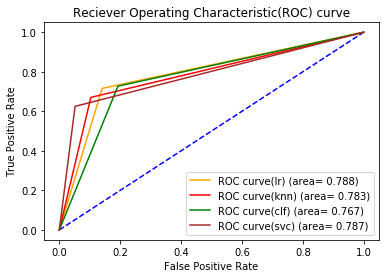

In [49]:
fpr, tpr, threshold= roc_curve(y_test,lr.predict(x_test))
plt.plot(fpr,tpr,color='orange',label='ROC curve(lr) (area= %0.3f)'%(roc_auc_score(y_test,lr.predict(x_test))))
plt.plot([0,1],[0,1], color='blue', linestyle='--')

fpr, tpr, threshold= roc_curve(y_test,knn.predict(x_test))
plt.plot(fpr,tpr,color='red', label='ROC curve(knn) (area= %0.3f)'%(roc_auc_score(y_test,knn.predict(x_test))))

fpr, tpr, threshold= roc_curve(y_test,clf.predict(x_test))
plt.plot(fpr,tpr,color='green', label='ROC curve(clf) (area= %0.3f)'%(roc_auc_score(y_test,clf.predict(x_test))))

fpr, tpr, threshold= roc_curve(y_test,svc.predict(x_test))
plt.plot(fpr,tpr,color='brown', label='ROC curve(svc) (area= %0.3f)'%(roc_auc_score(y_test,svc.predict(x_test))))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic(ROC) curve')
plt.legend(loc='lower right')
plt.show() 

By looking at the differences we observe SVC is our best model. Now we'll move forward to tune our model.

## Hyper-Parametric Tuning

In [50]:
svc=SVC()
param={'kernel':['linear','poly','rbf'],'gamma':['scale','auto'] ,'probability':[True, False],'degree':[2,3,4,5]}
grid_search=GridSearchCV(estimator=svc, param_grid=param, cv=5, n_jobs=-1)
grid_search.fit(x_train,y_train)
best_parameter=grid_search.best_params_
print(best_parameter)

{'degree': 2, 'gamma': 'scale', 'kernel': 'poly', 'probability': True}


In [51]:
svc= SVC(degree=2,gamma='scale',kernel='poly',probability=True)
svc.fit(x_train,y_train)
y_pred= svc.predict(x_test)
print("SVC model Score =",accuracy_score(y_test,y_pred))

SVC model Score = 0.7982062780269058


In [52]:
cfm =confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cfm,"\n")
print("Classification Report:\n",classification_report(y_test,y_pred,digits=2))
print("\n ROC_AUC_Score for SVM= ",roc_auc_score(y_test,svc.predict(x_test)))

Confusion Matrix :
 [[121  14]
 [ 31  57]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.84       135
           1       0.80      0.65      0.72        88

    accuracy                           0.80       223
   macro avg       0.80      0.77      0.78       223
weighted avg       0.80      0.80      0.79       223


 ROC_AUC_Score for SVM=  0.7720117845117845


### Saving Model

In [53]:
filename= "Titanic_Train.pickle"
pickle.dump(svc,open(filename,'wb'))